## Probability Lab - 1

<h3>Ayush Deshmukh - 211IT014</h3>

In [29]:
import random 
import numpy as np
from tensorflow.math import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
truth = list(np.random.randint(low = 0,high=2,size=500))
truth[:10]

[0, 1, 1, 0, 1, 1, 0, 1, 1, 1]

In [163]:
pred = list(np.random.randint(low = 0,high=2,size=500))
pred[:10]

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [164]:
def true_positive(truth,pred):
    '''
    True positives are positive labels(1) that the model got correct
    
    parameter
    --------
    truth : list of true labels
    pred  : list of predicted labels
    '''
    true_positive = 0
    for i in range(len(truth)):
        if truth[i]==1 and pred[i]==1:
            true_positive+=1
    return true_positive

In [165]:
def true_negative(truth,pred):
    '''
    True negatives are negative labels(0) that the model got correct
    
    parameter
    --------
    truth : list of true labels
    pred  : list of predicted labels
    '''
    true_negative = 0

    for i in range(len(truth)):
        if truth[i]==0 and pred[i]==0:
            true_negative+=1
    return true_negative

In [166]:
def false_positive(truth,pred):
    '''
    False positives are negative labels(0) that the model got incorrect i.e it said a person has the disease but in reality he does not
    
    parameter
    --------
    truth : list of true labels
    pred  : list of predicted labels
    '''
    false_positive = 0
    for i in range(len(truth)):
        if truth[i]==0 and pred[i]==1:
            false_positive+=1
    return false_positive

In [167]:
def false_negative(truth,pred):
    '''
    False negative are positive labels(1) that the model got incorrect i.e it said a person does not have the disease but in reality he does.
    
    parameter
    --------
    truth : list of true labels
    pred  : list of predicted labels
    '''
    false_negative = 0
    for i in range(len(truth)):
        if truth[i]==1 and pred[i]==0:
            false_negative+=1
    return false_negative

In [168]:
tp = true_positive(truth,pred)
tp

126

In [169]:
tn = true_negative(truth,pred)
tn

120

In [170]:
fp = false_positive(truth,pred)
fp

124

In [171]:
fn = false_negative(truth,pred)
fn

130

## Question 1

In [172]:
def have_disease(truth):
    pos = 0
    for i in range(len(truth)):
        if truth[i]==1:
            pos+=1
    return pos/len(truth)

In [173]:
q1 = have_disease(truth)
q1

0.512

## Question 2

In [174]:
def probpos(tp,tn,fp,fn):
    return (tp+fp)/(tp+tn+fp+fn)

In [175]:
q2 = probpos(tp,tn,fp,fn)
q2

0.5

## Question 3

In [176]:
def pos_given_having(tp,fn):
    return tp/(tp+fn)

In [177]:
q3 = pos_given_having(tp,fn)
q3

0.4921875

## Question 4

In [178]:
def bayes_q4(tp,tn,fp,fn):
    return pos_given_having(tp,fn)*have_disease(truth)/probpos(tp,tn,fp,fn)

In [179]:
q4 = bayes_q4(tp,tn,fp,fn)
q4

0.504

In [180]:
## Question 4

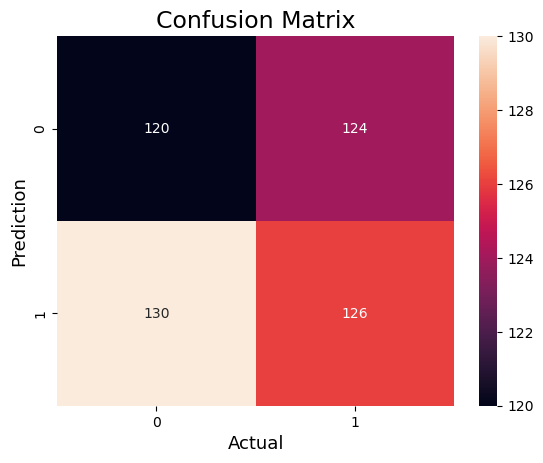

In [181]:
matrix = confusion_matrix(truth,pred)
sns.heatmap(matrix,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [182]:
def accuracy(tp,tn,fp,fn):
    return (tp+tn)/(tp+tn+fp+fn)
def sensitivity(tp,fn):
    return tp/(tp+fn)
def speciicity(tn,fp):
    return tn/(tn+fp)

In [183]:
a = accuracy(tp,tn,fp,fn)
a

0.492

In [184]:
sen = sensitivity(tp,fn)
sen

0.4921875

In [185]:
spe = speciicity(tn,fp)
spe

0.4918032786885246

## Question 6

In [186]:
def precision(tp,fp):
    return (tp)/(tp+fp)
def recall(tp,fn):
    return tp/(tp+fn)
def f1score(tp,fp,fn):
    return (2*precision(tp,fp)*recall(tp,fn)/(precision(tp,fp)+recall(tp,fn)))
    

In [187]:
pre = precision(tp,fp)
pre

0.504

In [188]:
rec = recall(tp,fn)
rec

0.4921875

In [189]:
f1 = f1score(tp,fp,fn)
f1

0.4980237154150197

## Question 7 : Analysis

In [190]:

record[len(truth)] = {'true_positive' : tp,'true_negative' : tn,'false_positive': fp,'false_negative' : fn, 'question1': q1, 'question2' : q2, 'question3' : q3,'question3' : q4,'accuracy' : a,
                      'sensitivity' : sen,'specificity' : spe,'precision' : pre,'recall' : rec,'f1score' :f1}

In [191]:
record

{20: {'true_positive': 2,
  'true_negative': 6,
  'false_positive': 4,
  'false_negative': 8,
  'question1': 0.5,
  'question2': 0.3,
  'question3': 0.33333333333333337,
  'accuracy': 0.4,
  'sensitivity': 0.2,
  'specificity': 0.6,
  'precision': 0.3333333333333333,
  'recall': 0.2,
  'f1score': 0.25},
 100: {'true_positive': 18,
  'true_negative': 26,
  'false_positive': 28,
  'false_negative': 28,
  'question1': 0.46,
  'question2': 0.46,
  'question3': 0.391304347826087,
  'accuracy': 0.44,
  'sensitivity': 0.391304347826087,
  'specificity': 0.48148148148148145,
  'precision': 0.391304347826087,
  'recall': 0.391304347826087,
  'f1score': 0.391304347826087},
 200: {'true_positive': 54,
  'true_negative': 43,
  'false_positive': 40,
  'false_negative': 63,
  'question1': 0.585,
  'question2': 0.47,
  'question3': 0.574468085106383,
  'accuracy': 0.485,
  'sensitivity': 0.46153846153846156,
  'specificity': 0.5180722891566265,
  'precision': 0.574468085106383,
  'recall': 0.46153846